In [276]:
import os
import sys
import pandas as pd
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
data_folder = '../data'
data_files = os.listdir(data_folder)

In [278]:
for file in data_files:
    print("for year "+file[-8:-4]+" : " + file)

for year 2014 : 22306_24.65_73.75_2014.csv
for year 2000 : 22306_24.65_73.75_2000.csv
for year 2012 : 22306_24.65_73.75_2012.csv
for year 2013 : 22306_24.65_73.75_2013.csv
for year 2008 : 22306_24.65_73.75_2008.csv
for year 2005 : 22306_24.65_73.75_2005.csv
for year 2007 : 22306_24.65_73.75_2007.csv
for year 2006 : 22306_24.65_73.75_2006.csv
for year 2009 : 22306_24.65_73.75_2009.csv
for year 2001 : 22306_24.65_73.75_2001.csv
for year 2011 : 22306_24.65_73.75_2011.csv
for year 2004 : 22306_24.65_73.75_2004.csv
for year 2010 : 22306_24.65_73.75_2010.csv
for year 2003 : 22306_24.65_73.75_2003.csv
for year 2002 : 22306_24.65_73.75_2002.csv


In [288]:
year_2014 = pd.read_csv(data_folder+'/'+data_files[0])
year_2014.head()

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Wind Direction Units,Wind Speed,Snow Depth Units,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Version
0,SUNY,22306,-,-,India,24.65,73.75,5.5,0,5.5,...,Degrees,m/s,m,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,unknown
1,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,0,30,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,1,30,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,2,30,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
new_columns = year_2014.iloc[1]
year_all = year_2014[2:]
year_all.columns =new_columns
year = year.loc[:, year.columns.notnull()]

# for counter,i in enumerate(new_columns):
#     print(i)


year = year_all.drop(columns=['Year','Month','Day','Minute','Hour','DHI','DNI','Clearsky DHI','Clearsky DNI','Fill Flag'])

In [281]:
year.head()

1,GHI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Snow Depth,Wind Direction,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0,0,4,12.751339552289267,957.9305419921875,58.41139916942352,177.55742015012578,1.3668830583200968,0.0,73.88963317871094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,6,12.196895002047142,957.7622680664062,67.29592773800267,168.03725969433503,1.4700043477445826,0.0,75.10269927978516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,7,11.806139366268553,957.8780517578125,72.56749007380043,154.41832139803458,1.5719694344243218,0.0,74.26346588134766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,0,7,11.510595990320212,957.6235961914062,75.29933981073673,140.83665499983437,1.6669825069938207,0.0,72.37870025634766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,0,7,11.306806960929293,957.932861328125,76.7992879237338,127.37552025553532,1.7609774282137391,0.0,70.31179809570312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
x = np.arange(year.shape[0])[0:100]
y = year['GHI'][0:100]

In [212]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='dkumar', api_key='*************************8')

x = np.arange(year.shape[0])
y = year['GHI']
trace = go.Scatter(
    x = x,
    y = y
)

data = [trace]

py.iplot(data, filename='basic-line')



trace = go.Scatter(
    x = x,
    y = y
)

data = [trace]

py.iplot(data, filename='basic-line')

PlotlyRequestError: Aw, snap! You tried to use our API as the user 'dkumar', but the supplied API key doesn't match our records. You can view your API key at https://plot.ly/settings/api

You're most likely getting this message because your local credentials file isn't synced with the Plotly server you're communicating with.

Go to https://plot.ly/<language>/getting-started (e.g., https://plot.ly/python/getting-started) for more information.

Make sure that you're logged in as dkumar.

Need help? Please try searching Plotly's <a href='http://stackoverflow.com/questions/tagged/plotly'>Stack Overflow channel</a>.

### Heatmap : Correlation plot

In [255]:
year = year.astype('float64')
year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 2 to 8761
Data columns (total 11 columns):
GHI                   8760 non-null float64
Clearsky GHI          8760 non-null float64
Dew Point             8760 non-null float64
Temperature           8760 non-null float64
Pressure              8760 non-null float64
Relative Humidity     8760 non-null float64
Solar Zenith Angle    8760 non-null float64
Precipitable Water    8760 non-null float64
Snow Depth            8760 non-null float64
Wind Direction        8760 non-null float64
Wind Speed            8760 non-null float64
dtypes: float64(11)
memory usage: 752.9 KB


In [216]:
corr_hm = sns.heatmap(year.corr(), 
                xticklabels=year.corr().columns,
                yticklabels=year.corr().columns,vmin=0,vmax=1,cmap="YlGnBu")
plt.show()
# plt.tight_layout()

corr_hm.figure.savefig("../docs/corr_heatmap.png",dpi=200,bbox_inches = "tight")

<IPython.core.display.Javascript object>


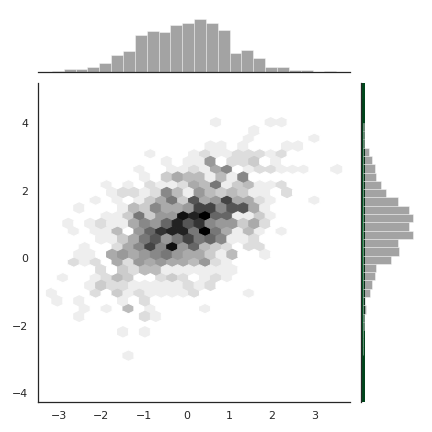

In [217]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

## XGBOOST Classfier

In [256]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer

In [259]:
# X = year.drop(columns=['GHI'])
# Y = year.pop('GHI')

transformer = Normalizer().fit(year)
year_norm = transformer.transform(year)

print(year_norm)
X = year_norm.drop(columns=['GHI'])
Y = year_norm.pop('GHI')

print(transformer)
print(X_norm)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = XGBClassifier()

[[0.         0.00408625 0.0130263  ... 0.         0.07548294 0.00452638]
 [0.         0.00613678 0.01247493 ... 0.         0.07681474 0.00455494]
 [0.         0.00717292 0.01209779 ... 0.         0.076098   0.0044426 ]
 ...
 [0.         0.         0.01546334 ... 0.         0.06476746 0.00437793]
 [0.         0.00102765 0.01465211 ... 0.         0.06889262 0.00445176]
 [0.         0.00204918 0.01382877 ... 0.         0.07267697 0.00448728]]


AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [231]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [232]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [246]:
# y_pred = model.predict(X_test)
from collections import Counter

predictions = [value for value in y_pred]
print(len(y_test))
# predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

2891
Accuracy: 52.54%


In [266]:
from scipy.stats import kde
%matplotlib inline
nbins=600
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

print(xi)
# plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
# plt.show()

[[-3.03342929 -3.03342929 -3.03342929 ... -3.03342929 -3.03342929
  -3.03342929]
 [-3.02444639 -3.02444639 -3.02444639 ... -3.02444639 -3.02444639
  -3.02444639]
 [-3.01546349 -3.01546349 -3.01546349 ... -3.01546349 -3.01546349
  -3.01546349]
 ...
 [ 2.32936251  2.32936251  2.32936251 ...  2.32936251  2.32936251
   2.32936251]
 [ 2.33834541  2.33834541  2.33834541 ...  2.33834541  2.33834541
   2.33834541]
 [ 2.34732831  2.34732831  2.34732831 ...  2.34732831  2.34732831
   2.34732831]]


In [289]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

'''
Lognorm: Instead of pcolor log10(Z1) you can have colorbars that have
the exponential labels using a norm.
'''
N = 100
# X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
# print(X)
X = year_all.pop('Day')
Y = year_all.pop('Hour')
print(X)
# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale so we see both hump and spike.  linear
# scale only shows the spike.
# Z = np.exp(-X**2 - Y**2)
Z = Y = year.pop('GHI')

# fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolor(X, Y, Z,
#                    norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
#                    cmap='PuBu_r')
# fig.colorbar(pcm, ax=ax[0], extend='max')

plt.pcolor(X, Y, Z, cmap='PuBu_r')
plt.colorbar(pcm, extend='max')

plt.show()

KeyError: 'Day'

<IPython.core.display.Javascript object>


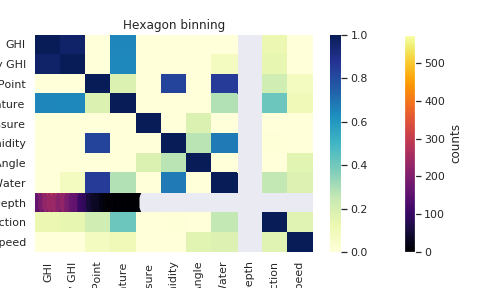

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib notebook
%matplotlib notebook

# Fixing random state for reproducibility
np.random.seed(19680801)

n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

plt.show()


In [214]:
import numpy as np

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin

n = 50000
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)

bins = hexbin(x, y, 0.1)

p = figure(title="Manual hex bin for 50000 points", tools="wheel_zoom,pan,reset",
           match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

p.hex_tile(q="q", r="r", size=0.1, line_color=None, source=bins,
           fill_color=linear_cmap('counts', 'Viridis256', 0, max(bins.counts)))

output_notebook()

show(p)

Loading BokehJS ...